In [1]:
%matplotlib inline
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import visuals as vs
random_state = 6
np.random.seed(random_state)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
df_train= pd.read_csv('geodynamics_100_steps.csv')
df_test= pd.read_csv('geodynamics_50_steps.csv')

In [3]:
df_train.columns.values 

array(['velocity:0', 'velocity:1', 'velocity:2', 'force:0', 'force:1',
       'force:2', 'total displacement:0', 'total displacement:1',
       'total displacement:2', 'temperature', 'temp_power',
       'temp_pressure', 'temp_density', 'node number', 'mesh quality',
       'plastic strain', 'plastic strain-rate', 'strain-rate II log10',
       'strain-rate XX', 'elastic_strain XX', 'strain-rate ZZ',
       'elastic_strain ZZ', 'strain-rate XZ', 'elastic_strain XZ',
       'strain I', 'strain II', 'strain XX', 'strain ZZ', 'strain XZ',
       'stress I', 'stress II', 'stress XX', 'stress ZZ', 'stress XZ',
       'density', 'thermal_stress', 'energy_total_vol_dev',
       'energy_volumetric', 'energy_deviatoric', 'energy_thermal',
       'energy_elastic', 'material', 'viscosity', 'effective viscosity',
       'elem number', 'coordinate:0', 'coordinate:1', 'coordinate:2'], dtype=object)

In [5]:
df_train['stress XX'].describe()

count    6.054000e+03
mean    -3.778194e+07
std      4.675290e+07
min     -3.104100e+08
25%     -6.946025e+07
50%     -2.763900e+07
75%     -1.785775e+06
max      5.321400e+07
Name: stress XX, dtype: float64

In [11]:
threshold = 0.15
df_train['plastic strain'] = np.where(df_train['plastic strain'] > threshold, 1,0)
df_test['plastic strain'] = np.where(df_test['plastic strain'] > threshold, 1,0)
df_train['stress XX'] = df_test['stress XX']/1000000
df_test['stress ZZ'] = df_test['stress ZZ']/1000000
df_test['stress XZ'] = df_test['stress XZ']/1000000

In [12]:
df_train['stress XX'].describe()

count    4929.000000
mean      -40.900244
std        49.955771
min      -273.270000
25%       -78.864000
50%       -24.601000
75%        -1.119300
max        56.336000
Name: stress XX, dtype: float64

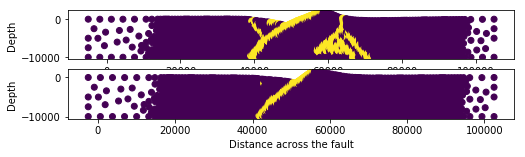

In [9]:
plt.figure(figsize=(8, 2))
plt.subplot(211)
plt.scatter(df_train['coordinate:0'], df_train['coordinate:1'], c = df_train['plastic strain'])
plt.xlabel('Distance across the fault')
plt.ylabel('Depth')

plt.subplot(212)
plt.scatter(df_test['coordinate:0'], df_test['coordinate:1'], c = df_test['plastic strain'])
plt.xlabel('Distance across the fault')
plt.ylabel('Depth')

plt.show()

In [10]:
mms = StandardScaler()
X_train = mms.fit_transform(df_train.drop('plastic strain', axis=1))
Y_train = df_train['plastic strain'].values

X_test = mms.fit_transform(df_test.drop('plastic strain', axis=1))
Y_test = df_test['plastic strain'].values

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [83]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
rfc = RandomForestClassifier(criterion='entropy', random_state = random_state, class_weight='balanced')
params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [10, 20, 40, 50]
}

grid_clf = GridSearchCV(estimator = rfc, param_grid = params, scoring = 'accuracy', cv = cv)




GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=6, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [10, 20, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [98]:
# we have to find out best optimized parameters
grid_clf.fit(X_train, Y_train.astype(int))

KeyboardInterrupt: 

In [84]:
# get the best model
print('\n # Best estimator ---------\n{}'.format(grid_clf.best_estimator_))

# Get the best parameters
print('\n # Best parameters ---------\n{}'.format(grid_clf.best_params_))

# best score
print('\n # Best score ---------\n{}'.format(grid_clf.best_score_))


 # Best estimator ---------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

 # Best parameters ---------
{'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 50}

 # Best score ---------
0.9907499174099769


In [85]:
Y_pred = grid_clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('The accuracy of the model is {}'.format(accuracy_score(Y_test, Y_pred)))
print('# Classification report \n {}'.format(classification_report(Y_test, Y_pred)))

The accuracy of the model is 0.8612294583079733
# Classification report 
              precision    recall  f1-score   support

          0       1.00      0.82      0.90      3749
          1       0.63      1.00      0.78      1180

avg / total       0.91      0.86      0.87      4929



In [87]:
confusion_matrix(Y_pred, Y_test)

array([[3065,    0],
       [ 684, 1180]])

In [89]:
model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

model.fit(X_train, Y_train.astype(int))
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

length = len(list(df_train))
features= list(df_train)[:length-1]

# Print the feature ranking
print("Feature ranking:")

features_rank =[]
label_name = []
for f in range(X_train.shape[1]):
    features_rank.append(importances[indices[f]])
    label_name.append(features[indices[f]])
    print("{}. Feature {} ({}%)".format(f + 1, features[indices[f]], round(importances[indices[f]]*100, 2)))

Feature ranking:
1. Feature thermal_stress (19.81%)
2. Feature strain I (17.38%)
3. Feature energy_volumetric (10.58%)
4. Feature strain ZZ (9.27%)
5. Feature viscosity (7.82%)
6. Feature strain-rate XX (7.5%)
7. Feature strain XX (3.3%)
8. Feature plastic strain-rate (2.89%)
9. Feature strain II (2.58%)
10. Feature stress XZ (2.25%)
11. Feature total displacement:1 (2.15%)
12. Feature velocity:1 (2.05%)
13. Feature strain-rate XZ (1.61%)
14. Feature node number (1.54%)
15. Feature elastic_strain XX (1.38%)
16. Feature coordinate:0 (1.07%)
17. Feature energy_deviatoric (0.96%)
18. Feature elastic_strain XZ (0.9%)
19. Feature strain-rate II log10 (0.6%)
20. Feature energy_thermal (0.42%)
21. Feature density (0.41%)
22. Feature elem number (0.39%)
23. Feature temperature (0.32%)
24. Feature stress I (0.28%)
25. Feature plastic strain (0.28%)
26. Feature total displacement:0 (0.27%)
27. Feature temp_density (0.25%)
28. Feature temp_pressure (0.21%)
29. Feature stress ZZ (0.2%)
30. Feature